# House price model prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df_houses = pd.read_csv('kc_house_data.csv')

In [3]:
df_houses.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8518,4038000040,20150326T000000,250000.0,4,1.75,1910,8250,1.0,0,0,...,7,1910,0,1959,0,98008,47.6131,-122.123,1500,8250
593,9542830350,20140902T000000,296000.0,4,2.50,1780,3600,2.0,0,0,...,7,1780,0,2006,0,98038,47.3665,-122.017,2020,3802
8346,272000355,20141108T000000,325000.0,3,1.50,1310,2998,2.0,0,0,...,7,1310,0,1998,0,98144,47.5873,-122.299,1310,2997
15856,23520380,20140909T000000,539000.0,3,1.75,1790,9860,1.0,0,0,...,7,1410,380,1978,0,98052,47.6989,-122.120,1820,9555
9596,472000620,20140502T000000,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750


In [5]:
100*df_houses.isnull().sum()/df_houses.shape[0]

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [6]:
df_houses.shape

(21613, 21)

In [10]:
data=df_houses.drop(['date', 'id', 'price'], axis=1)

In [13]:
data.shape

(21613, 18)

In [14]:
target=df_houses['price']

In [15]:
target.shape

(21613,)

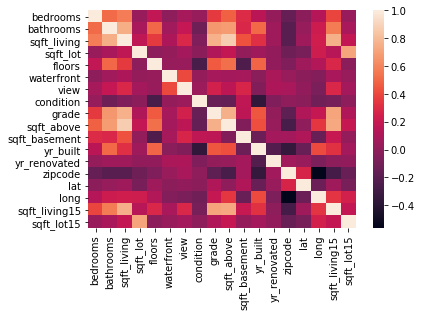

In [16]:
sns.heatmap(data.corr())

## Correlación entre variables

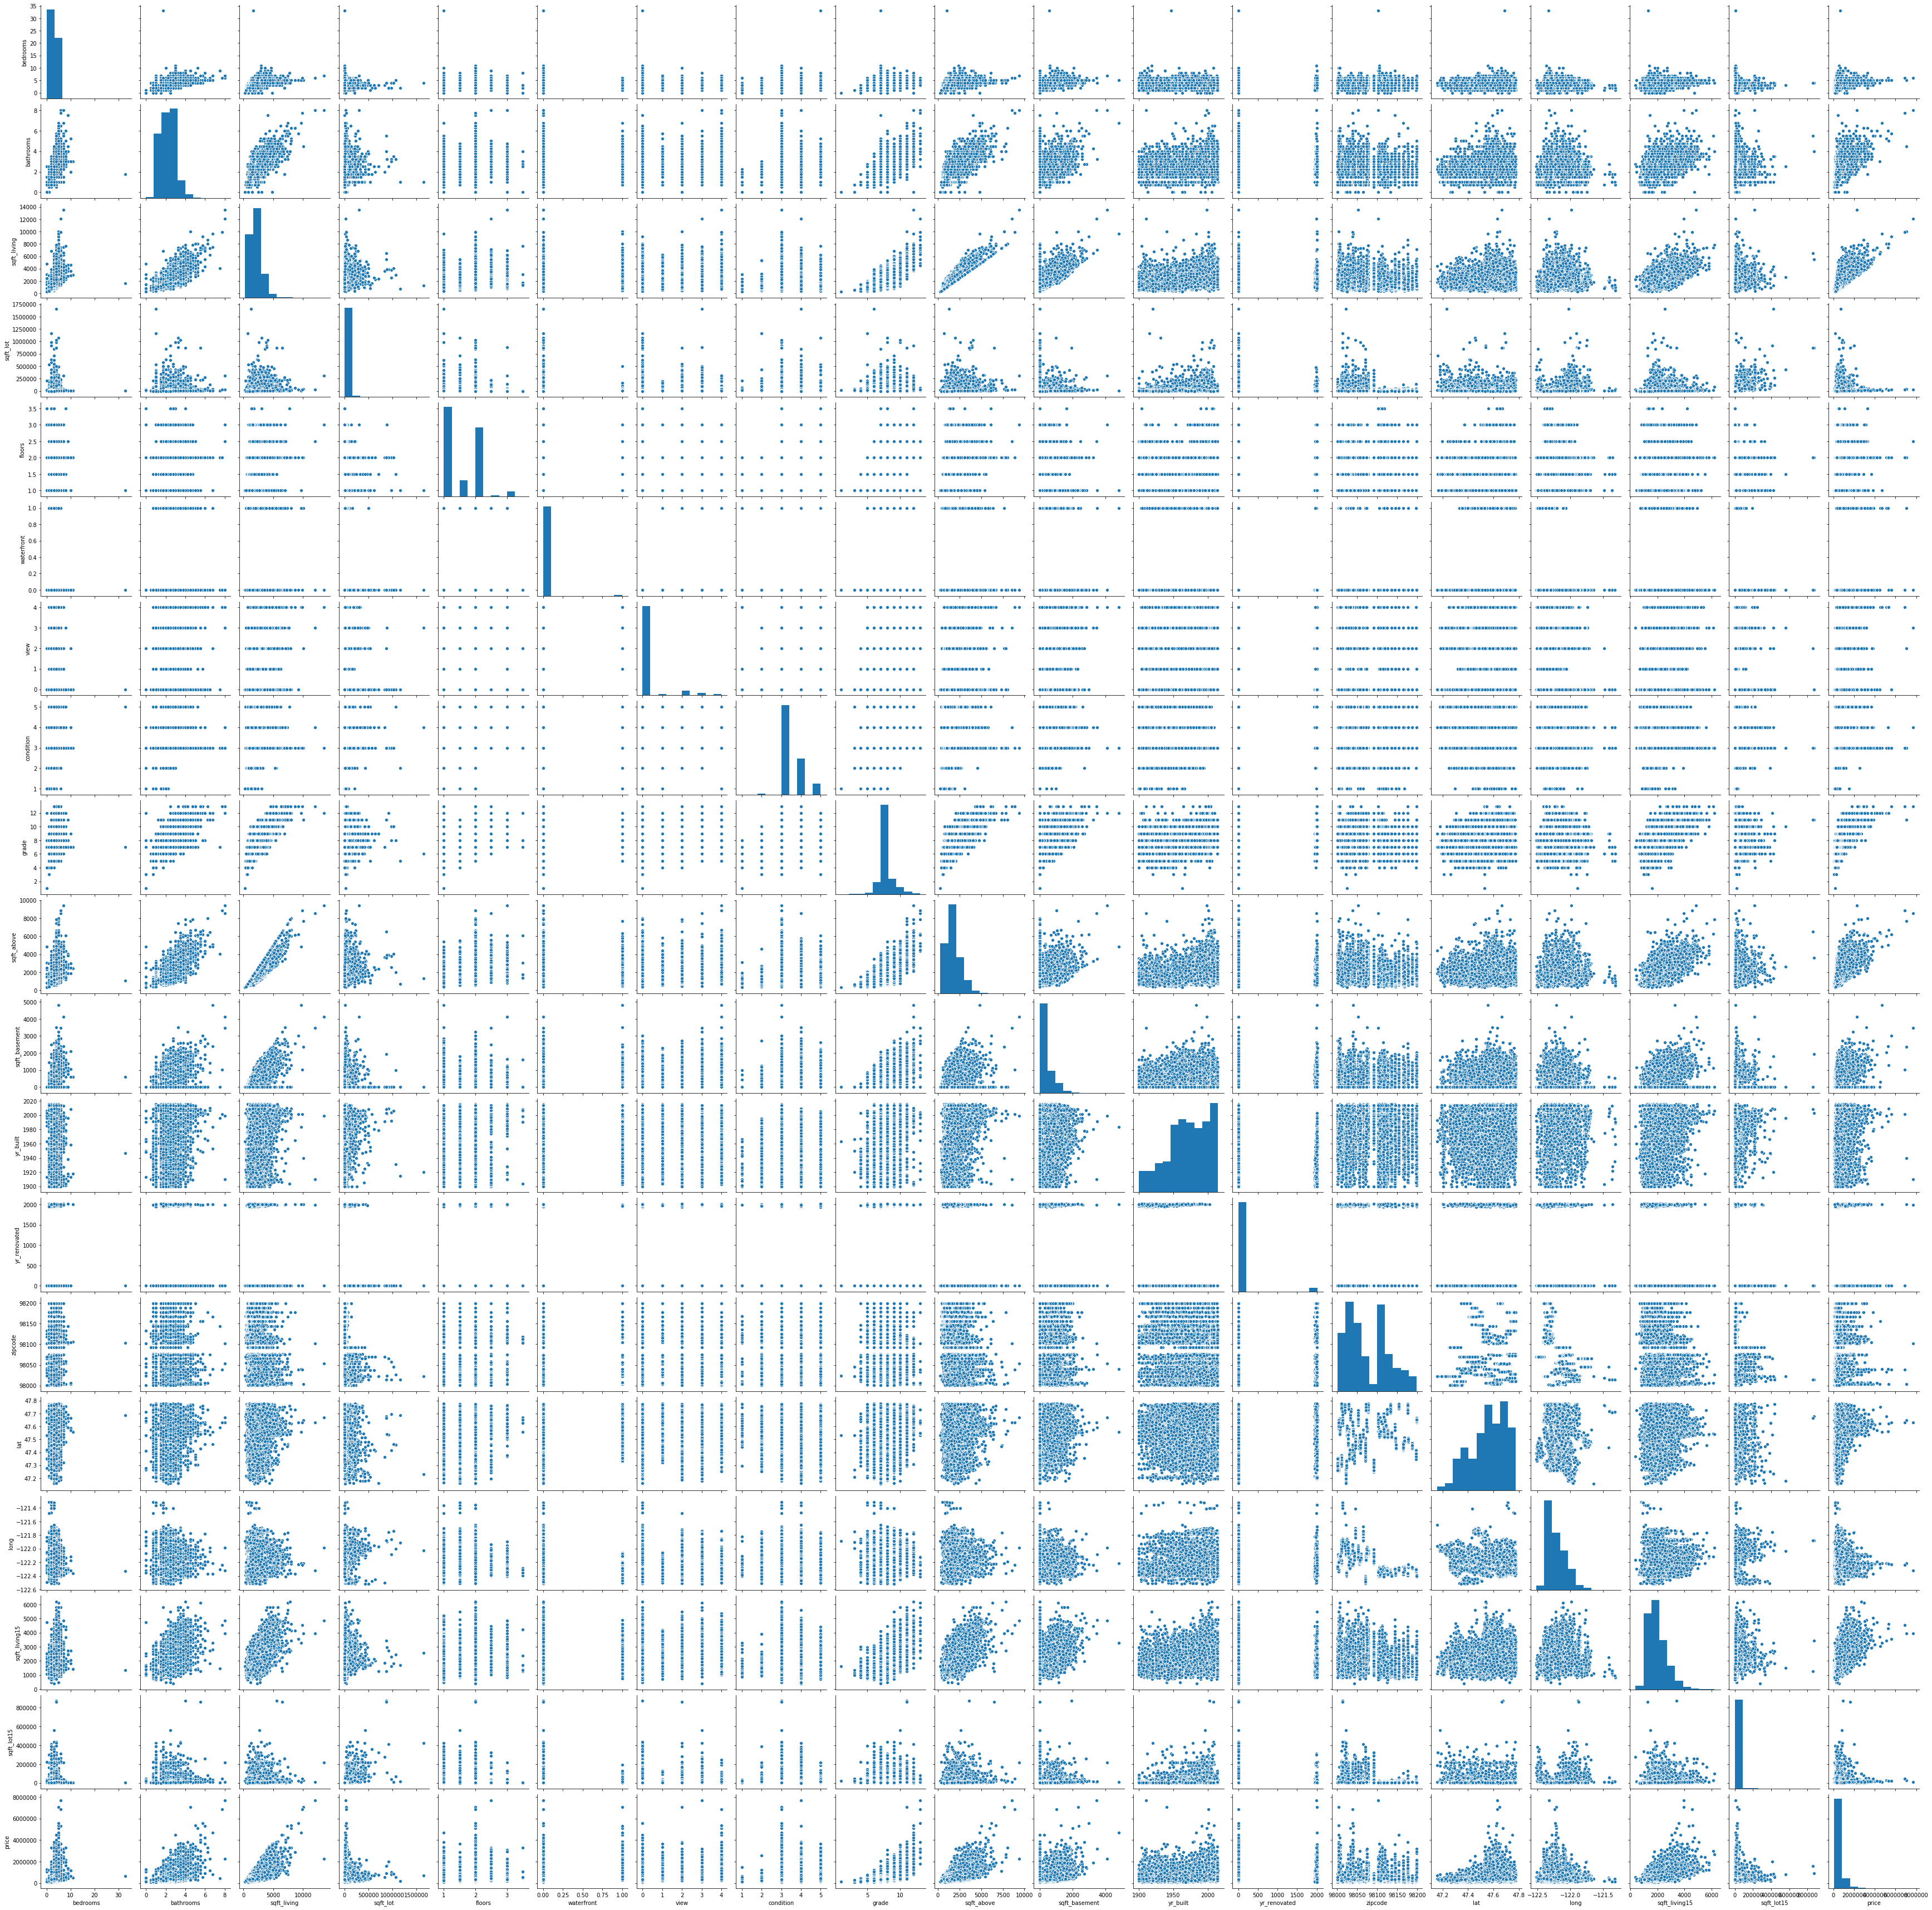

In [17]:
import seaborn as sns

Z = pd.concat([data,target],axis=1)
sns.pairplot(Z)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(data,target)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000021DBB09C8B8>)

In [22]:
scores = selector.scores_

In [26]:
lista=list(data.columns)

In [29]:
lista[0]

'bedrooms'

In [30]:
scores[0]

0.08259629239111455

In [33]:
i=0
for element in lista:
    print('{} = {}'.format(lista[i],scores[i]))
    i +=1

bedrooms = 0.08259629239111455
bathrooms = 0.20459218474899243
sqft_living = 0.35176105519502165
sqft_lot = 0.06079432674771468
floors = 0.06997007502801189
waterfront = 0.015859534878365
view = 0.06357446014346557
condition = 0.010112768828093532
grade = 0.3356305404848299
sqft_above = 0.2617291641232695
sqft_basement = 0.06748983504855799
yr_built = 0.07424904554228906
yr_renovated = 0.004624213509297981
zipcode = 0.418854094530972
lat = 0.34209451007911085
long = 0.11585434509442205
sqft_living15 = 0.27132701962722283
sqft_lot15 = 0.08165952134350629


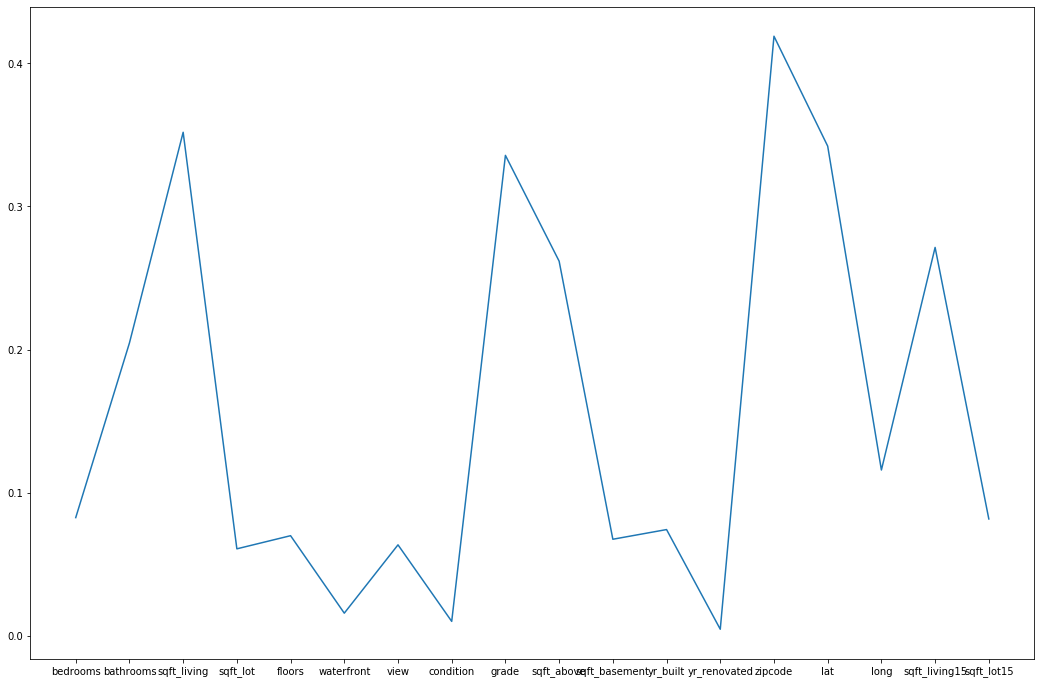

In [35]:
plt.rcParams["figure.figsize"] = [18,12]
plt.plot(scores)
plt.xticks(np.arange(18),list(data.columns));

 ## model selection
 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
X_train,X_test, y_train,y_test = train_test_split(data,target, random_state=1)

In [42]:
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = ElasticNetCV()
#reg4 = GradientBoostingRegressor(random_state=1, n_estimators=10)
#reg5 = RandomForestRegressor(random_state=1, n_estimators=10)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275477644850265.34, tolerance: 204716103876.03802
  positive)


In [48]:
y_predict = ereg.predict(X_test)

In [45]:
ereg.score(X_test, y_test)

0.6425915768117705

In [46]:
ereg.score(X_train, y_train)

0.6702997049866355

In [49]:
linear_loss = mean_squared_error(y_test, y_predict)

In [50]:
print("Linear Loss:", linear_loss)

Linear Loss: 57228734953.74601


In [56]:
reg1 = LinearRegression()
reg2 = Lasso(alpha=0.02)
reg3 = Ridge(alpha=1)
reg4 = ElasticNetCV()
reg5 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg6 = RandomForestRegressor(random_state=1, n_estimators=10)
ereg = VotingRegressor(estimators=[('lr', reg1), ('ls', reg2), ('rd', reg3), ('en', reg4), ('gb', reg5), ('rf', reg6)])
ereg = ereg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275452669694889.12, tolerance: 204716103876.03802
  positive)


In [57]:
ereg.score(X_train, y_train)

0.7719782971795954

In [58]:
ereg.score(X_test, y_test)

0.7148616936820965

In [59]:
linear_loss = mean_squared_error(y_test, y_predict)

In [60]:
print("Linear Loss:", linear_loss)

Linear Loss: 57228734953.74601


In [65]:
reg1 = LinearRegression()
reg2 = Lasso(alpha=0.02)
reg3 = Ridge(alpha=1)
reg4 = ElasticNetCV()
reg5 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg6 = RandomForestRegressor(random_state=1, n_estimators=10)
ereg = VotingRegressor(estimators=[('lr', reg1), ('ls', reg2), ('rd', reg3), ('en', reg4), ('gb', reg5), ('rf', reg6)], n_jobs=15)
ereg = ereg.fit(X_train, y_train)

In [66]:
ereg.score(X_train, y_train)

0.771978297179577

In [67]:
ereg.score(X_test, y_test)

0.7148616936820709

In [68]:
linear_loss = mean_squared_error(y_test, y_predict)

In [69]:
print("Linear Loss:", linear_loss)

Linear Loss: 57228734953.74601


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

revisar = model_selection para graficar
https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py